[View in Colaboratory](https://colab.research.google.com/github/Howida100/deep-learning-/blob/master/CNN_minst_datase.ipynb)

In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,  Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
%matplotlib inline

Using TensorFlow backend.


In [2]:
mnist_data = fashion_mnist.load_data()
x = mnist_data[0][0]
y = mnist_data[0][1]

4423680/4422102 [==============================] - 4s 1us/step


In [0]:
epochs = 10
num_classes = 10
batch_size = 128
batch_size = 128
img_rows, img_cols = 28, 28

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [0]:
if K.image_data_format() == "channels first":
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 225
x_test /= 225

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [11]:
my_callbacks = [EarlyStopping(monitor="acc", patience=5, mode=max)]

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:496: RuntimeWarning: EarlyStopping mode <built-in function max> is unknown, fallback to auto mode.
  RuntimeWarning)


In [12]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.3, callbacks=my_callbacks)
score = model.evaluate(x_test, y_test)
print("Testing Loss:", score[0])
print("Testing Accuracy:", score[1])


Train on 28140 samples, validate on 12060 samples
Epoch 1/10
28140/28140 [==============================] - 6s 211us/step - loss: 2.2860 - acc: 0.1285 - val_loss: 1.9509 - val_acc: 0.5127
Epoch 2/10
28140/28140 [==============================] - 4s 141us/step - loss: 1.1527 - acc: 0.5673 - val_loss: 0.7098 - val_acc: 0.7189
Epoch 3/10
28140/28140 [==============================] - 4s 141us/step - loss: 0.7395 - acc: 0.7217 - val_loss: 0.6201 - val_acc: 0.7620
Epoch 4/10
28140/28140 [==============================] - 4s 139us/step - loss: 0.6641 - acc: 0.7482 - val_loss: 0.5771 - val_acc: 0.7906
Epoch 5/10
28140/28140 [==============================] - 4s 140us/step - loss: 0.6254 - acc: 0.7642 - val_loss: 0.5557 - val_acc: 0.7940
Epoch 6/10
28140/28140 [==============================] - 4s 140us/step - loss: 0.5952 - acc: 0.7786 - val_loss: 0.5648 - val_acc: 0.7836
Epoch 7/10
28140/28140 [==============================] - 4s 139us/step - loss: 0.5692 - acc: 0.7839 - val_loss: 0.5303 - 

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

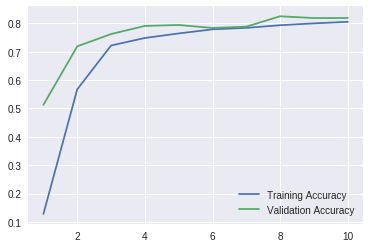

In [14]:
epoch_list = list(range(1, len(hist.history['acc']) + 1))
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(("Training Accuracy", "Validation Accuracy"))
plt.show()